In [1]:
from car import plot
from car.camera import CameraRGB
from car import steering, throttle
from car.rc import query_receiver, manual_control

import numpy as np

from IPython.display import clear_output
import time

In [2]:
camera = CameraRGB(height=128, width=160, fps=8)

(128, 160, 3)
Plotting 1 frame...


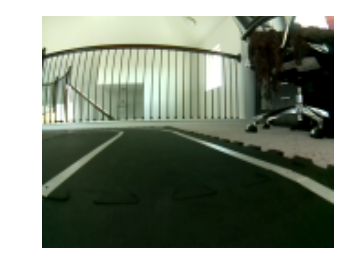

In [3]:
frame = camera.capture()
print(frame.shape)
plot(frame, figsize=(4,3))

In [10]:
manual_control()

KeyboardInterrupt: 

In [20]:
throttle.set_throttle(0)
steering.set_steering(0)

start = time.time()

X = []
y = []

try:
    while True:
        frame = camera.capture()
        s, t = query_receiver()
        steering.set_steering(s)
        clear_output(True)
        if t < -85.0:
            print("End!")
            break
        X.append(frame)
        y.append(s)
        print("Appended frame with " + str(s) + " (and " + str(t) + ")")
        throttle.set_throttle(70)
        time.sleep(0.1)
        throttle.set_throttle(0)
        time.sleep(0.2)

except KeyboardInterrupt:
    throttle.set_throttle(0)

print(time.time() - start)

End!
443.22496938705444


In [21]:
len(X)

886

In [22]:
np.save("X32.npy", X)
np.save("y32.npy", y)

In [ ]:
plot(np.array(X[:9]), figsize=(15, 7))